In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [50]:
#Load and split data.
digits = datasets.load_digits()

X = digits.data / 255
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#Knn Classifier.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9861111111111112


In [52]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [53]:
#SVM Classifier.
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [65]:
kernels = ['linear', 'poly', 'rbf']
reports = []
accuracys = []

for kernel in kernels:
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train, y_train)
    
    y_pred = svm_classifier.predict(X_test)
    
    reports.append(classification_report(y_test, y_pred))
    accuracys.append(accuracy_score(y_test, y_pred))

for i in range(len(reports)):
    print(f"Kernel: {kernels[i]}")
    print(f"Accuracy: {accuracys[i]}")
    print(reports[i])
    print("="*55)

Kernel: linear
Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.65      0.79      0.71        28
           2       0.88      0.91      0.90        33
           3       0.89      0.91      0.90        34
           4       0.98      0.91      0.94        46
           5       0.93      0.79      0.85        47
           6       0.97      0.97      0.97        35
           7       0.89      0.97      0.93        34
           8       0.88      0.73      0.80        30
           9       0.72      0.78      0.75        40

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.87       360
weighted avg       0.88      0.88      0.88       360

Kernel: poly
Accuracy: 0.9916666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
     

Conclusion: 

Based on the provided results, both the polynomial and radial basis function kernels seem to be suitable choices for this case due to their high accuracy scores.

In [55]:
#Naive Bayes Classifier.
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8472222222222222


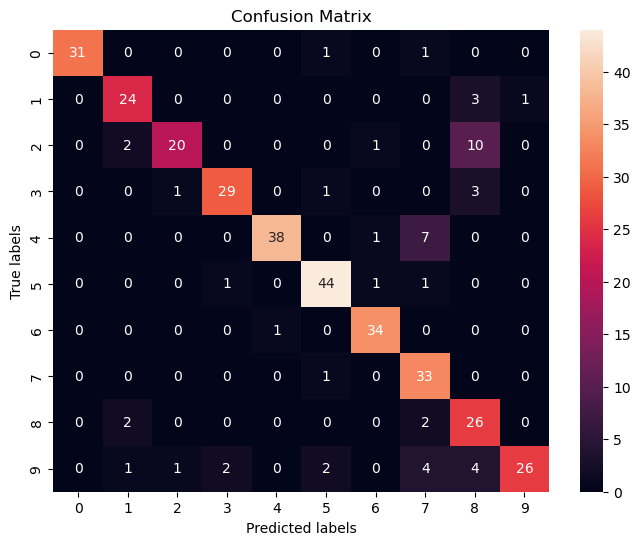

In [56]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', )
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [123]:
df = pd.read_csv("gapminder.csv")

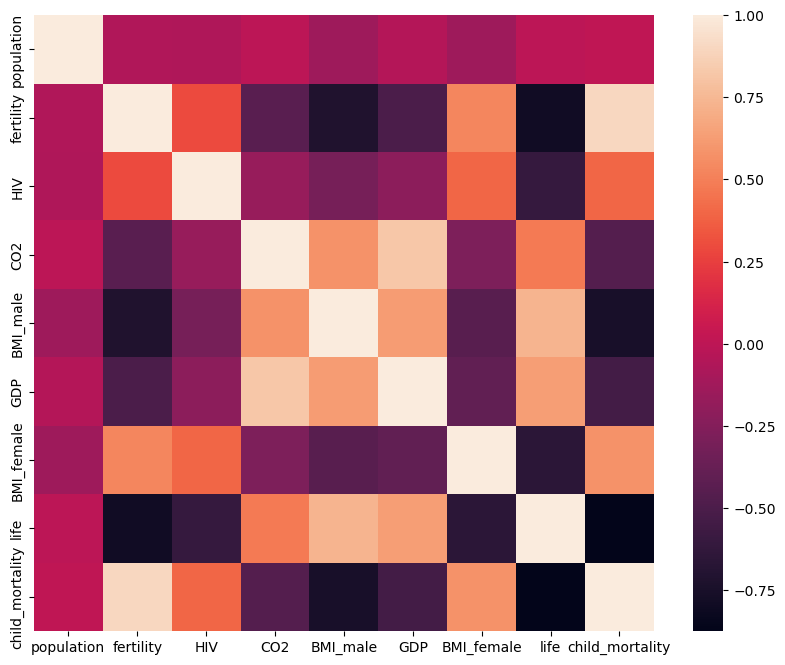

In [80]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap='rocket', fmt=".2f", annot_kws={"size": 10})

plt.show()

In [90]:
#Linear Regression
X = df[['fertility']]
y = df['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 12.719085109582467


In [96]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean MSE across all folds: {mean_mse}")
print(f"Standard deviation of MSE across all folds: {std_mse}")

Mean MSE across all folds: 32.272414259121526
Standard deviation of MSE across all folds: 12.674485652545789


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


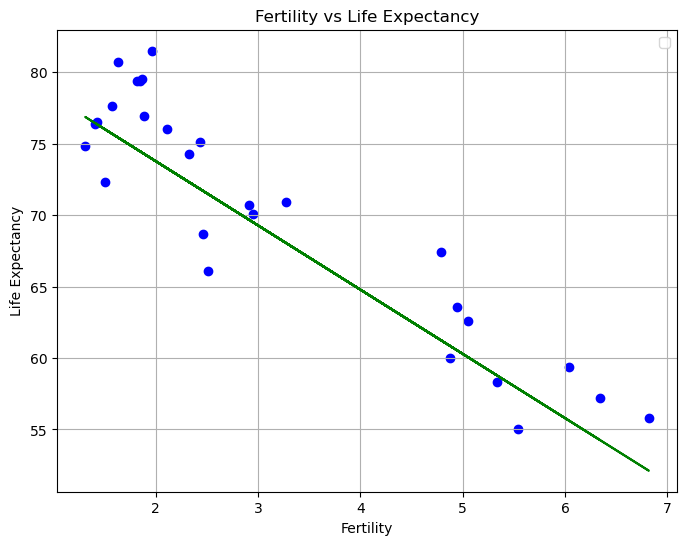

In [98]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='green')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.title('Fertility vs Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
X_all = df.drop(['life', 'Region'], axis=1)
y_all = df['life']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)
y_pred_all = model_all.predict(X_test_all)
mse_all = mean_squared_error(y_test_all, y_pred_all)

print("Mean Squared Error:", mse_all)

Mean Squared Error: 5.312562889562959


In [97]:
scores = cross_val_score(model, X_all, y_all, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean MSE across all folds: {mean_mse}")
print(f"Standard deviation of MSE across all folds: {std_mse}")

Mean MSE across all folds: 10.623794181975807
Standard deviation of MSE across all folds: 2.9152156460372796


In [124]:
fraud_df = pd.read_csv("creditcard.csv")
frauds = fraud_df[fraud_df['Class'] == 1]
non_frauds = fraud_df[fraud_df['Class'] == 0]
print(f"{len(frauds)} frauds, {len(non_frauds)} non frauds")

492 frauds, 284315 non frauds


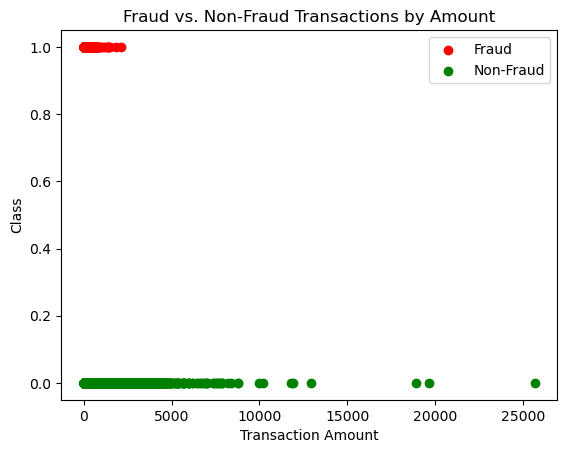

In [116]:
plt.scatter(frauds['Amount'], frauds['Class'], color='red', label='Fraud')
plt.scatter(non_frauds['Amount'], non_frauds['Class'], color='green', label='Non-Fraud')

plt.xlabel('Transaction Amount')
plt.ylabel('Class')
plt.title('Fraud vs. Non-Fraud Transactions by Amount')

plt.legend()
plt.show()

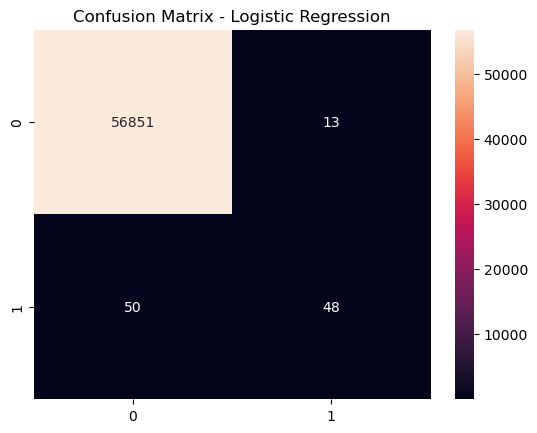

In [129]:
X = fraud_df.drop(columns=['Class'])
y = fraud_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Conclusion:

While the model shows promising results with a low number of false positives, there is still a notable number of false negatives that need to be addressed for better fraud detection. Further optimization or adjustment of the model may be necessary to improve its performance.